# 2021-05-25 • Signals for PGR conf

Trying to recreate https://tfiers.github.io/voltage-to-wiring-sim/notebooks/2020-07-27__Synaptic_conductances.html

lol, different train generation method (exp draw vs per timebin rand), so not same spikes even if same seed.

Ah well. I can create new then.

In [1]:
from voltage_to_wiring_sim.notebook_init import *

Preloading: numpy, numba, matplotlib.pyplot, seaborn.
Importing from submodules … ✔
Imported `np`, `mpl`, `plt`, `sns`, `pd`
Imported codebase (`voltage_to_wiring_sim`) as `v`
Imported `*` from `v.support.units`
Setup autoreload


In [2]:
v.print_reproducibility_info()

This cell was last run by `tfiers` on `yoga` on **Wed 26 May** 2021, at 11:31 (UTC+0100).<br>
[Last git commit](https://github.com/tfiers/voltage-to-wiring-sim/tree/56fda1dcdac8164529f91d4c2b83bdb807425769
) (Mon 22 Feb 2021, 18:28).
Uncommited changes to 13 files.

In [3]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('svg')

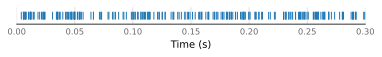

In [19]:
v.fix_rng_seed(152)

sim_duration = 300*ms
spikes = v.generate_Poisson_spikes(spike_rate=15 * 50 * Hz, simulation_duration=sim_duration)

v.plot_spike_train(spikes, time_range=(0, sim_duration), linewidth=1);
plt.savefig('spieks.svg')

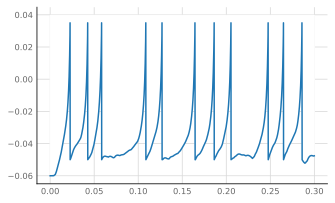

In [22]:
Δg_syn = 0.9 * nS
τ_syn = 7 * ms

dt = 0.1 * ms
g_syn = v.calc_synaptic_conductance(sim_duration, dt, spikes, Δg_syn, τ_syn)

neuron_params = v.sim.neuron_params.cortical_RS

sim = v.simulate_izh_neuron(sim_duration, dt, neuron_params, g_syn)
ax = v.plot_signal(sim.V_m)
plt.fill_between(sim.V_m.time, sim.V_m, ax.get_ylim()[1], color='white')
plt.savefig('cleansig.svg')

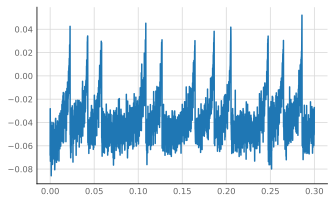

In [24]:
VI_spike_SNR = 10
VI = v.add_VI_noise(sim.V_m, neuron_params, VI_spike_SNR)
v.plot_signal(VI)
plt.savefig('VI.svg')

In [17]:
spike_height = neuron_params.v_peak - neuron_params.v_r
σ_noise = spike_height / VI_spike_SNR

0.0095

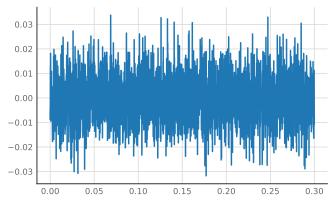

In [18]:
v.plot_signal(VI - sim.V_m)
plt.savefig('noise.svg')

In [19]:
v.print_reproducibility_info(verbose=True)

This cell was last run by `tfiers` on `yoga`<br>on **Tue 25 May** 2021, at 15:53 (UTC+0100).

[Last git commit](https://github.com/tfiers/voltage-to-wiring-sim/tree/56fda1dcdac8164529f91d4c2b83bdb807425769
) (Mon 22 Feb 2021, 18:28).

Uncommited changes to:
```
 M notebooks/2020-07-27__Synaptic_conductances.ipynb
 M website/_toc.yml
?? notebooks/2021-02-22__spikes_only_conntests.ipynb
?? notebooks/2021-03-10__cond_prob.ipynb
?? notebooks/2021-03-12__entropies_toy_example.ipynb
?? notebooks/2021-03-12__parcorr_toy_example.ipynb
?? notebooks/2021-05-25__PGR_conf.ipynb
?? website/thesis/images/NCC_network.png
?? website/thesis/images/Sutera_filters.png
?? website/thesis/images/save_psd_as_png_too.flag
```

Platform:

Windows-10
CPython 3.8.6 (C:\conda\python.exe)
Intel(R) Core(TM) i7-10510U CPU @ 1.80GHz


Dependencies of `voltage_to_wiring_sim` and their installed versions:

numpy                1.19.5
matplotlib           3.3.4
numba                0.52.0
joblib               1.0.1
seaborn              0.11.1
scipy                1.6.0
preload              2.2
nptyping             1.4.0


Full conda list:

```
# packages in environment at C:\conda:
#
# Name                    Version                   Build  Channel
anyio                     2.0.2            py38haa244fe_4    conda-forge
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
argon2-cffi               20.1.0           py38h294d835_2    conda-forge
async_generator           1.10                       py_0    conda-forge
atomicwrites              1.4.0              pyh9f0ad1d_0    conda-forge
attrs                     20.3.0             pyhd3deb0d_0    conda-forge
babel                     2.9.0              pyhd3deb0d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
black                     20.8b1                     py_1    conda-forge
bleach                    3.3.0              pyh44b312d_0    conda-forge
bokeh                     2.2.3            py38haa244fe_0    conda-forge
brotlipy                  0.7.0           py38h294d835_1001    conda-forge
bzip2                     1.0.8                h8ffe710_4    conda-forge
ca-certificates           2020.12.5            h5b45459_0    conda-forge
certifi                   2020.12.5        py38haa244fe_1    conda-forge
cffi                      1.14.4           py38hd8c33c5_1    conda-forge
chardet                   4.0.0            py38haa244fe_1    conda-forge
click                     7.1.2              pyh9f0ad1d_0    conda-forge
cloudpickle               1.6.0                      py_0    conda-forge
colorama                  0.4.4              pyh9f0ad1d_0    conda-forge
conda                     4.9.2            py38haa244fe_0    conda-forge
conda-package-handling    1.7.2            py38h8934438_0    conda-forge
console_shortcut          0.1.1                         4  
cryptography              3.3.1            py38hd8c33c5_1    conda-forge
cycler                    0.10.0                     py_2    conda-forge
cytoolz                   0.11.0           py38h294d835_3    conda-forge
dask                      2021.1.0           pyhd8ed1ab_0    conda-forge
dask-core                 2021.1.0           pyhd8ed1ab_0    conda-forge
dataclasses               0.7                pyhb2cacf7_7    conda-forge
decorator                 4.4.2                      py_0    conda-forge
defusedxml                0.6.0                      py_0    conda-forge
distributed               2021.1.1         py38haa244fe_0    conda-forge
docutils                  0.16                     pypi_0    pypi
entrypoints               0.3             pyhd8ed1ab_1003    conda-forge
freetype                  2.10.4               h546665d_1    conda-forge
fsspec                    0.8.5              pyhd8ed1ab_0    conda-forge
gitdb                     4.0.5              pyhd8ed1ab_1    conda-forge
gitpython                 3.1.12             pyhd8ed1ab_0    conda-forge
heapdict                  1.0.1                      py_0    conda-forge
icu                       68.1                 h0e60522_0    conda-forge
idna                      2.10               pyh9f0ad1d_0    conda-forge
importlib-metadata        3.4.0            py38haa244fe_0    conda-forge
importlib_metadata        3.4.0                hd8ed1ab_0    conda-forge
iniconfig                 1.1.1              pyh9f0ad1d_0    conda-forge
intel-openmp              2020.3             h57928b3_311    conda-forge
ipykernel                 5.4.2            py38h7b7c402_0    conda-forge
ipython                   7.20.0           py38hc5df569_1    conda-forge
ipython_genutils          0.2.0                      py_1    conda-forge
ipywidgets                7.6.3              pyhd3deb0d_0    conda-forge
jedi                      0.18.0           py38haa244fe_2    conda-forge
jinja2                    2.11.3             pyh44b312d_0    conda-forge
joblib                    1.0.1                    pypi_0    pypi
jpeg                      9d                   h8ffe710_0    conda-forge
json5                     0.9.5              pyh9f0ad1d_0    conda-forge
jsonschema                3.2.0                      py_2    conda-forge
jupyter_client            6.1.11             pyhd8ed1ab_1    conda-forge
jupyter_contrib_core      0.3.3                      py_2    conda-forge
jupyter_contrib_nbextensions 0.5.1            py38h32f6830_1    conda-forge
jupyter_core              4.7.1            py38haa244fe_0    conda-forge
jupyter_highlight_selected_word 0.2.0           py38haa244fe_1002    conda-forge
jupyter_latex_envs        1.4.6           py38h32f6830_1001    conda-forge
jupyter_nbextensions_configurator 0.4.1            py38haa244fe_2    conda-forge
jupyter_server            1.2.2            py38haa244fe_1    conda-forge
jupyterlab                3.0.5              pyhd8ed1ab_0    conda-forge
jupyterlab-classic        0.1.3              pyhd8ed1ab_0    conda-forge
jupyterlab-sublime        0.4.1                    pypi_0    pypi
jupyterlab_pygments       0.1.2              pyh9f0ad1d_0    conda-forge
jupyterlab_server         2.1.4              pyhd8ed1ab_0    conda-forge
jupyterlab_widgets        1.0.0              pyhd8ed1ab_1    conda-forge
jupytext                  1.10.0             pyh44b312d_0    conda-forge
jupytray                  0.7.post10+dirty           dev_0    <develop>
keyring                   21.8.0                   pypi_0    pypi
kiwisolver                1.3.1            py38hbd9d945_1    conda-forge
krb5                      1.17.2               hbae68bd_0    conda-forge
libarchive                3.5.1                h8686738_1    conda-forge
libblas                   3.9.0                     8_mkl    conda-forge
libcblas                  3.9.0                     8_mkl    conda-forge
libclang                  11.0.1          default_h5c34c98_1    conda-forge
libcurl                   7.71.1               h4b64cdc_8    conda-forge
libiconv                  1.16                 he774522_0    conda-forge
liblapack                 3.9.0                     8_mkl    conda-forge
libpng                    1.6.37               h1d00b33_2    conda-forge
libsodium                 1.0.18               h8d14728_1    conda-forge
libsolv                   0.7.17               h7755175_0    conda-forge
libssh2                   1.9.0                hb06d900_5    conda-forge
libtiff                   4.2.0                hc10be44_0    conda-forge
libxml2                   2.9.10               hf5bbc77_3    conda-forge
libxslt                   1.1.33               h65864e5_2    conda-forge
llvmlite                  0.35.0           py38h57a6900_1    conda-forge
locket                    0.2.0                      py_2    conda-forge
lxml                      4.6.2            py38h292cb97_1    conda-forge
lz4-c                     1.9.3                h8ffe710_0    conda-forge
lzo                       2.10              he774522_1000    conda-forge
m2w64-gcc-libgfortran     5.3.0                         6    conda-forge
m2w64-gcc-libs            5.3.0                         7    conda-forge
m2w64-gcc-libs-core       5.3.0                         7    conda-forge
m2w64-gmp                 6.1.0                         2    conda-forge
m2w64-libwinpthread-git   5.0.0.4634.697f757               2    conda-forge
mamba                     0.7.8            py38hdd88130_0    conda-forge
markdown-it-py            0.6.2              pyhd8ed1ab_0    conda-forge
markupsafe                1.1.1            py38h294d835_3    conda-forge
matplotlib-base           3.3.4            py38h34ddff4_0    conda-forge
mdit-py-plugins           0.2.5              pyhd8ed1ab_0    conda-forge
menuinst                  1.4.16           py38he774522_1  
mistune                   0.8.4           py38h294d835_1003    conda-forge
mkl                       2020.4             hb70f87d_311    conda-forge
more-itertools            8.6.0              pyhd8ed1ab_0    conda-forge
mpmath                    1.1.0                      py_0    conda-forge
msgpack-python            1.0.2            py38hbd9d945_1    conda-forge
msys2-conda-epoch         20160418                      1    conda-forge
multipledispatch          0.6.0                    pypi_0    pypi
multitasking              0.0.9                    pypi_0    pypi
mypy_extensions           0.4.3            py38haa244fe_3    conda-forge
natsort                   7.1.1              pyhd8ed1ab_0    conda-forge
nb_conda_kernels          2.3.1            py38haa244fe_0    conda-forge
nbclassic                 0.2.6              pyhd8ed1ab_0    conda-forge
nbclient                  0.5.1                      py_0    conda-forge
nbconvert                 6.0.7            py38haa244fe_3    conda-forge
nbdime                    2.1.0                      py_0    conda-forge
nbformat                  5.0.8                      py_0    conda-forge
nest-asyncio              1.4.3              pyhd8ed1ab_0    conda-forge
notebook                  6.2.0            py38haa244fe_0    conda-forge
nptyping                  1.4.0                    pypi_0    pypi
numba                     0.52.0           py38h4c96930_0    conda-forge
numpy                     1.19.5           py38h0cc643e_1    conda-forge
oauthlib                  3.1.0                    pypi_0    pypi
olefile                   0.46               pyh9f0ad1d_1    conda-forge
openssl                   1.1.1i               h8ffe710_0    conda-forge
packaging                 20.8               pyhd3deb0d_0    conda-forge
pandas                    1.2.1            py38h4c96930_0    conda-forge
pandas-flavor             0.2.0                      py_0    conda-forge
pandoc                    2.11.4               h8ffe710_0    conda-forge
pandocfilters             1.4.2                      py_1    conda-forge
parso                     0.8.1              pyhd8ed1ab_0    conda-forge
partd                     1.1.0                      py_0    conda-forge
pathspec                  0.8.1              pyhd3deb0d_0    conda-forge
patsy                     0.5.1                      py_0    conda-forge
pickleshare               0.7.5                   py_1003    conda-forge
pillow                    8.1.0            py38hf7ce48b_1    conda-forge
pip                       21.0.1             pyhd8ed1ab_0    conda-forge
pkginfo                   1.6.1                    pypi_0    pypi
pluggy                    0.13.1           py38haa244fe_4    conda-forge
powershell_shortcut       0.0.1                         3  
preload                   2.2                      pypi_0    pypi
prometheus_client         0.9.0              pyhd3deb0d_0    conda-forge
prompt-toolkit            3.0.14             pyha770c72_0    conda-forge
psutil                    5.8.0            py38h294d835_1    conda-forge
puprelease                1.8.1                     dev_0    <develop>
py                        1.10.0             pyhd3deb0d_0    conda-forge
pycosat                   0.6.3           py38h294d835_1006    conda-forge
pycparser                 2.20               pyh9f0ad1d_2    conda-forge
pygments                  2.7.4              pyhd8ed1ab_0    conda-forge
pyopenssl                 20.0.1             pyhd8ed1ab_0    conda-forge
pyparsing                 2.4.7              pyh9f0ad1d_0    conda-forge
pyqt                      5.12.3           py38haa244fe_7    conda-forge
pyqt-impl                 5.12.3           py38h885f38d_7    conda-forge
pyqt5-sip                 4.19.18          py38h885f38d_7    conda-forge
pyqtchart                 5.12             py38h885f38d_7    conda-forge
pyqtwebengine             5.12.1           py38h885f38d_7    conda-forge
pyrsistent                0.17.3           py38h294d835_2    conda-forge
pysocks                   1.7.1            py38haa244fe_3    conda-forge
pytest                    6.2.1            py38haa244fe_1    conda-forge
python                    3.8.6           h7840368_4_cpython    conda-forge
python-dateutil           2.8.1                      py_0    conda-forge
python_abi                3.8                      1_cp38    conda-forge
pytz                      2021.1             pyhd8ed1ab_0    conda-forge
pywin32                   300              py38h294d835_0    conda-forge
pywin32-ctypes            0.2.0                    pypi_0    pypi
pywinpty                  0.5.7            py38h32f6830_1    conda-forge
pyyaml                    5.4.1            py38h294d835_0    conda-forge
pyzmq                     22.0.1           py38h7a0e47e_0    conda-forge
qt                        5.12.9               h5909a2a_3    conda-forge
readme-renderer           28.0                     pypi_0    pypi
regex                     2020.11.13       py38h294d835_1    conda-forge
reproc                    14.2.1               h8ffe710_0    conda-forge
reproc-cpp                14.2.1               h0e60522_0    conda-forge
requests                  2.25.1             pyhd3deb0d_0    conda-forge
requests-oauthlib         1.3.0                    pypi_0    pypi
requests-toolbelt         0.9.1                    pypi_0    pypi
rfc3986                   1.4.0                    pypi_0    pypi
ruamel_yaml               0.15.80         py38h294d835_1004    conda-forge
scikit-learn              0.24.1           py38ha09990b_0    conda-forge
scipy                     1.6.0            py38h5f893b4_0    conda-forge
seaborn                   0.11.1               h57928b3_0    conda-forge
seaborn-base              0.11.1             pyhd8ed1ab_1    conda-forge
send2trash                1.5.0                      py_0    conda-forge
setuptools                49.6.0           py38haa244fe_3    conda-forge
setuptools-scm            5.0.1                    pypi_0    pypi
six                       1.15.0             pyh9f0ad1d_0    conda-forge
smmap                     3.0.5              pyh44b312d_0    conda-forge
snakeviz                  2.1.0              pyh9f0ad1d_0    conda-forge
sniffio                   1.2.0            py38haa244fe_1    conda-forge
sortedcontainers          2.3.0              pyhd8ed1ab_0    conda-forge
sqlite                    3.34.0               h8ffe710_0    conda-forge
statsmodels               0.12.2           py38h347fdf6_0    conda-forge
sympy                     1.7.1            py38haa244fe_1    conda-forge
tblib                     1.6.0                      py_0    conda-forge
terminado                 0.9.2            py38haa244fe_0    conda-forge
testpath                  0.4.4                      py_0    conda-forge
tfiers                    0.3.2                     dev_0    <develop>
threadpoolctl             2.1.0              pyh5ca1d4c_0    conda-forge
tk                        8.6.10               h8ffe710_1    conda-forge
toml                      0.10.2             pyhd8ed1ab_0    conda-forge
toolz                     0.11.1                     py_0    conda-forge
tornado                   6.1              py38h294d835_1    conda-forge
tqdm                      4.56.0             pyhd8ed1ab_0    conda-forge
traitlets                 5.0.5                      py_0    conda-forge
tweepy                    3.10.0                   pypi_0    pypi
twine                     3.3.0                    pypi_0    pypi
typed-ast                 1.4.2            py38h294d835_0    conda-forge
typing_extensions         3.7.4.3                    py_0    conda-forge
typish                    1.9.1                    pypi_0    pypi
unitlib                   0.3                      pypi_0    pypi
unyt                      2.8.0                    pypi_0    pypi
urllib3                   1.26.3             pyhd8ed1ab_0    conda-forge
vc                        14.2                 hb210afc_2    conda-forge
voltage-to-wiring-sim     0.1                       dev_0    <develop>
vs2015_runtime            14.28.29325          h5e1d092_0    conda-forge
wcwidth                   0.2.5              pyh9f0ad1d_2    conda-forge
webencodings              0.5.1                      py_1    conda-forge
wheel                     0.36.2             pyhd3deb0d_0    conda-forge
widgetsnbextension        3.5.1            py38haa244fe_4    conda-forge
win_inet_pton             1.1.0            py38haa244fe_2    conda-forge
wincertstore              0.2             py38haa244fe_1006    conda-forge
windows-curses            2.2.0                    pypi_0    pypi
winpty                    0.4.3                         4    conda-forge
winshell                  0.6                      pypi_0    pypi
xarray                    0.16.2             pyhd8ed1ab_0    conda-forge
xlrd                      2.0.1              pyhd8ed1ab_3    conda-forge
xz                        5.2.5                h62dcd97_1    conda-forge
yaml                      0.2.5                he774522_0    conda-forge
yfinance                  0.1.55                   pypi_0    pypi
zeromq                    4.3.3                h0e60522_3    conda-forge
zict                      2.0.0                      py_0    conda-forge
zipp                      3.4.0                      py_0    conda-forge
zlib                      1.2.11            h62dcd97_1010    conda-forge
zstd                      1.4.8                h4e2f164_1    conda-forge
```